<a href="https://colab.research.google.com/github/tadeugomes/mba_enap_python/blob/main/CD/Atividades_Exercicios/Aula3_Exercicio3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 3.1

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')


Authenticated


In [2]:
import pandas as pd
## Defina o id do seu projeto no bigquery!!!!!
project_id = 'enap-mba-470912 ' # Defina o id do seu projeto no bigquery!!!!!
## Defina o id do seu projeto no bigquery!!!!!

df = pd.io.gbq.read_gbq('''
SELECT ... ''', project_id=project_id)

df.head()

/tmp/ipython-input-3685716950.py:6: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.io.gbq.read_gbq('''


GenericGBQException: Reason: 400 POST https://bigquery.googleapis.com/bigquery/v2/projects/enap-mba-470912%20/queries?prettyPrint=false: Cannot parse  as CloudRegion.

### Minha Query

In [2]:
import pandas as pd
## Defina o id do seu projeto no bigquery!!!!!
project_id = 'enap-mba-470912' # Defina o id do seu projeto no bigquery!!!!!
## Defina o id do seu projeto no bigquery!!!!!

df = pd.io.gbq.read_gbq('''
SELECT
  pib.ano AS ano,
  uf.sigla AS sigla_uf,
  mun.id_municipio,
  pop.populacao,
  mun.nome AS nome_municipio,
  pib.pib,
  ROUND(CAST(pib.pib AS FLOAT64)/NULLIF(CAST(pop.populacao AS FLOAT64),0), 6) AS pibpercapita
FROM
  `basedosdados.br_ibge_pib.municipio` AS pib
JOIN
  `basedosdados.br_ibge_populacao.municipio` AS pop
    ON pib.id_municipio = pop.id_municipio AND pib.ano = pop.ano
JOIN
  `basedosdados.br_bd_diretorios_brasil.municipio` AS mun
    ON pib.id_municipio = mun.id_municipio
JOIN
  `basedosdados.br_bd_diretorios_brasil.uf` AS uf
    ON mun.id_uf = uf.id_uf
WHERE
  pib.ano BETWEEN 2002 AND 2018
ORDER BY
  ano, sigla_uf, nome_municipio
''', project_id=project_id)

df.head()

/tmp/ipython-input-679519711.py:6: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.io.gbq.read_gbq('''


,ano,sigla_uf,id_municipio,populacao,nome_municipio,pib,pibpercapita
0,2002,AC,1200013,8454,Acrelândia,39622000,4686.775491
1,2002,AC,1200054,3611,Assis Brasil,12789000,3541.678205
2,2002,AC,1200104,17649,Brasiléia,72997000,4136.041702
3,2002,AC,1200138,6382,Bujari,26743000,4190.379191
4,2002,AC,1200179,5814,Capixaba,32492000,5588.579291


In [ ]:
## Explique o que fez na sua query e por que.
# Fiz o left join da população porque essa tabela tem mais anos.
# Tive que fazer o distinct da tabela geobr_mapas porque essa tabela granularidade de setor censitário.

### Explicar o que fiz na query

### Explicar o que fiz na query

Esta query SQL busca dados de diferentes tabelas públicas do BigQuery (`basedosdados`) para calcular o Produto Interno Bruto (PIB) per capita para os municípios brasileiros entre os anos de 2002 e 2018.

Aqui está uma quebra do que a query faz:

1.  **`SELECT ...`**: Especifica as colunas que serão retornadas no resultado final.
    *   `pib.ano AS ano`: Seleciona o ano da tabela de PIB e o renomeia como `ano`.
    *   `uf.sigla AS sigla_uf`: Seleciona a sigla da UF da tabela de UFs e a renomeia como `sigla_uf`.
    *   `mun.id_municipio`: Seleciona o ID do município da tabela de municípios.
    *   `pop.populacao`: Seleciona a população da tabela de população.
    *   `mun.nome AS nome_municipio`: Seleciona o nome do município da tabela de municípios e o renomeia como `nome_municipio`.
    *   `pib.pib`: Seleciona o valor do PIB da tabela de PIB.
    *   `ROUND(CAST(pib.pib AS FLOAT64)/NULLIF(CAST(pop.populacao AS FLOAT64),0), 6) AS pibpercapita`: Calcula o PIB per capita.
        *   `CAST(... AS FLOAT64)`: Converte os valores de PIB e população para números decimais para garantir uma divisão precisa.
        *   `NULLIF(CAST(pop.populacao AS FLOAT64),0)`: Garante que a divisão não ocorra por zero, retornando NULL se a população for zero.
        *   `ROUND(..., 6)`: Arredonda o resultado do PIB per capita para 6 casas decimais.
        *   `AS pibpercapita`: Nomeia a coluna resultante como `pibpercapita`.

2.  **`FROM basedosdados.br_ibge_pib.municipio AS pib`**: Define a tabela `basedosdados.br_ibge_pib.municipio` como a tabela principal e a renomeia como `pib` para facilitar a referência.

3.  **`JOIN ... ON ...`**: Conecta a tabela principal (`pib`) a outras tabelas usando colunas comuns:
    *   `JOIN basedosdados.br_ibge_populacao.municipio AS pop ON pib.id_municipio = pop.id_municipio AND pib.ano = pop.ano`: Junta com a tabela de população (`pop`) onde o ID do município e o ano coincidem.
    *   `JOIN basedosdados.br_bd_diretorios_brasil.municipio AS mun ON pib.id_municipio = mun.id_municipio`: Junta com a tabela de diretórios de municípios (`mun`) onde o ID do município coincide.
    *   `JOIN basedosdados.br_bd_diretorios_brasil.uf AS uf ON mun.id_uf = uf.id_uf`: Junta com a tabela de diretórios de UFs (`uf`) onde o ID da UF coincide (conectando através da tabela de municípios `mun`).

4.  **`WHERE pib.ano BETWEEN 2002 AND 2018`**: Filtra os resultados para incluir apenas os registros onde o ano está entre 2002 e 2018, inclusive.

5.  **`ORDER BY ano, sigla_uf, nome_municipio`**: Ordena os resultados primeiro pelo ano, depois pela sigla da UF e, por fim, pelo nome do município em ordem alfabética.

Em resumo, a query combina dados de PIB, população, municípios e UFs para calcular o PIB per capita para cada município em cada ano entre 2002 e 2018.

## Submeta o seu dataframe criando uma tabela no BigQuery

In [4]:
df.to_gbq("enapdatasets.pibpercapita",
              project_id=project_id,
              chunksize=40000,
              if_exists='replace',
              )

/tmp/ipython-input-3064127241.py:1: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  df.to_gbq("enapdatasets.pibpercapita",
100%|██████████| 1/1 [00:00<00:00, 10356.31it/s]


#### O comando acima cria um dataset chamado enapdatasets e dentro dele uma tabela chamada pibpercapita.
#### Por padrão, os dados são guardados fisicamente nos EUA, onde também estão guardados os dados do projeto basedosdados.
#### Não é possível fazer join de dados guardados em locais distintos

##### Aqui há uma demonstração de como [criar um dataset manualmente](https://youtu.be/h_HRXdket7U)

Tabela 1 - Uma Tabela com informações básicas do ano de 2018

In [5]:
# Filter the DataFrame for the year 2018
df_2018 = df[df['ano'] == 2018].copy() # Use .copy() to avoid SettingWithCopyWarning

# Format 'pib' and 'pibpercapita' columns
df_2018['pib'] = df_2018['pib'].apply(lambda x: f'{x:,.0f}'.replace(',', '.')) # Format PIB as integer with dot as thousands separator
df_2018['pibpercapita'] = df_2018['pibpercapita'].apply(lambda x: f'{x:,.2f}'.replace(',', '.')) # Format PIB per capita with 2 decimal places and dot as thousands separator

# Select the desired columns
df_2018 = df_2018[['sigla_uf', 'nome_municipio', 'pib', 'pibpercapita']]

# Display the resulting table
display(df_2018.head())

,sigla_uf,nome_municipio,pib,pibpercapita
89055,AC,Acrelândia,253.138.000,16.853.40
89056,AC,Assis Brasil,89.875.000,12.311.64
89057,AC,Brasiléia,439.547.000,17.005.07
89058,AC,Bujari,158.191.000,15.645.44
89059,AC,Capixaba,164.238.000,14.336.42


Criar um gráfico de linha com o PIB percapita separado para cada um dos estados de SP, RS, CE e AM, dos anos de 2002 a 2018

---



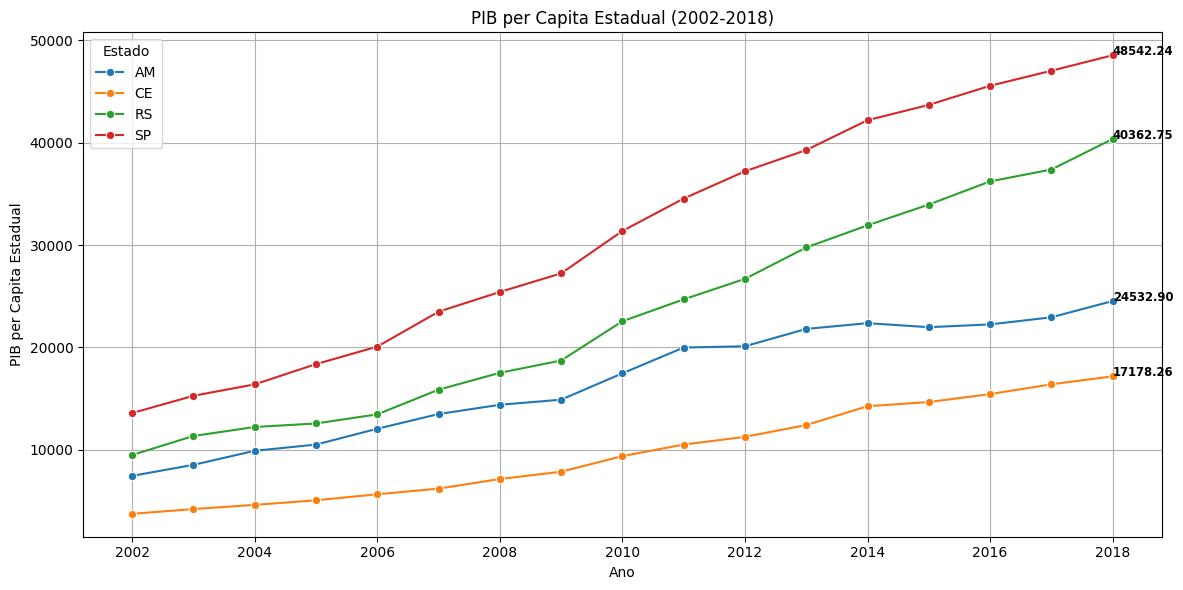

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the specified states
selected_states = ['SP', 'RS', 'CE', 'AM']
df_filtered = df[df['sigla_uf'].isin(selected_states)].copy()

# Calculate total PIB and population for each state and year
df_state_agg = df_filtered.groupby(['ano', 'sigla_uf']).agg(
    total_pib=('pib', 'sum'),
    total_populacao=('populacao', 'sum')
).reset_index()

# Calculate state-level PIB per capita
df_state_agg['pibpercapita'] = df_state_agg['total_pib'] / df_state_agg['total_populacao']

# Create the line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df_state_agg, x='ano', y='pibpercapita', hue='sigla_uf', marker='o')

# Add value at the last data point for each state
for state in selected_states:
    last_data_point = df_state_agg[df_state_agg['sigla_uf'] == state].iloc[-1]
    ax.text(last_data_point['ano'], last_data_point['pibpercapita'], f'{last_data_point["pibpercapita"]:.2f}',
            horizontalalignment='left', size='small', color='black', weight='semibold')


plt.title('PIB per Capita Estadual (2002-2018)')
plt.xlabel('Ano')
plt.ylabel('PIB per Capita Estadual')
plt.grid(True)
plt.legend(title='Estado')
plt.tight_layout()
plt.show()


Criar uma tabela de heatmap com o PIB percapita dos estados (eixo vertical) ao longo dos últimos 10 anos (2008-2010) no eixo horizontal
*italicized text*


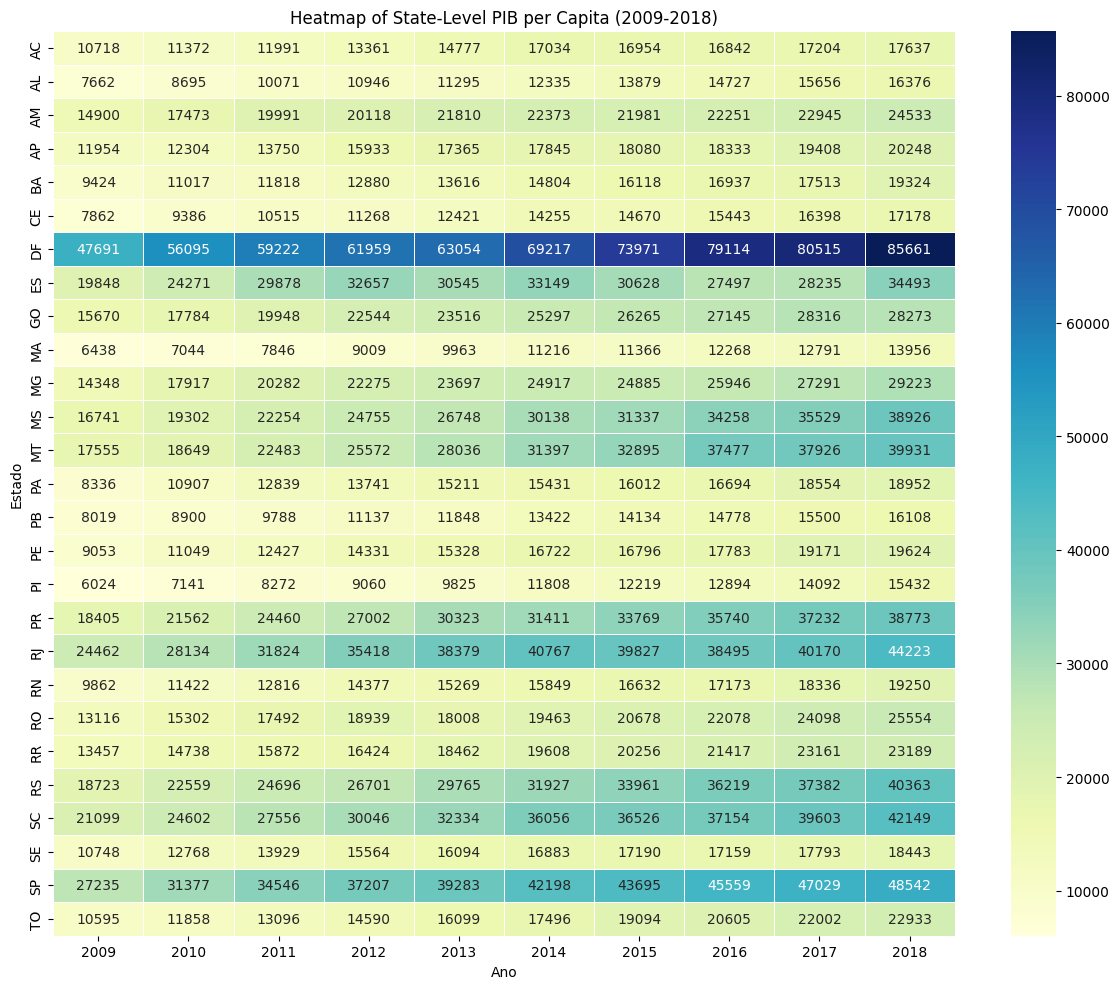

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que seu DataFrame original seja 'df', já carregado e com as colunas:
# 'ano', 'sigla_uf', 'pib', 'populacao'

# 1. Filtrar os dados para os anos de 2009 em diante
df_last_10_years = df[df['ano'] >= 2009].copy()

# 2. Agregar total do PIB e população por estado e ano
df_state_agg_10_years = df_last_10_years.groupby(['ano', 'sigla_uf']).agg(
    total_pib=('pib', 'sum'),
    total_populacao=('populacao', 'sum')
).reset_index()

# 3. Calcular o PIB per capita
df_state_agg_10_years['pibpercapita'] = (
    df_state_agg_10_years['total_pib'] / df_state_agg_10_years['total_populacao']
)

# 4. Pivotar para formato matriz (heatmap)
heatmap_data = df_state_agg_10_years.pivot(
    index='sigla_uf', columns='ano', values='pibpercapita'
)

# 5. Converter para float explicitamente (corrigindo problemas de dtype)
heatmap_data = heatmap_data.astype(float)

# 6. Plotar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)

plt.title('Heatmap of State-Level PIB per Capita (2009-2018)')
plt.xlabel('Ano')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()
